Index(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip',
       'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children',
       'Age', 'Income', 'Marital', 'Gender', 'ReAdmis', 'VitD_levels',
       'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink',
       'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Services', 'Initial_days', 'TotalCharge', 'Additional_charges',
       'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')
Summary of Null: 
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job           

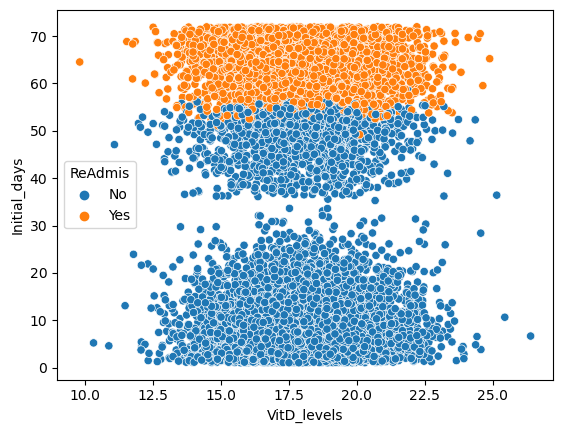

Index(['Initial_days', 'VitD_levels', 'ReAdmis'], dtype='object')
           Initial_days  VitD_levels ReAdmis
CaseOrder                                   
1             10.585770    19.141466      No
2             15.129562    18.940352      No
3              4.772177    18.057507      No
4              1.714879    16.576858      No
5              1.254807    17.439069      No
           Initial_days  VitD_levels ReAdmis
CaseOrder                                   
1             -0.907310     0.583603      No
2             -0.734595     0.483901      No
3             -1.128292     0.046227      No
4             -1.244503    -0.687811      No
5             -1.261991    -0.260366      No
Prepared Data has been exported to CSV
 Data has been prepared     


C:\Users\herlihpj\AppData\Local\Temp\ipykernel_21336\2171597209.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med_mine[numeric_cols] = scaler.transform(med_mine[numeric_cols])
C:\Users\herlihpj\AppData\Local\Temp\ipykernel_21336\2171597209.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med_mine['ReAdmis']=med_mine.ReAdmis.map(dict(Yes=1, No=0))


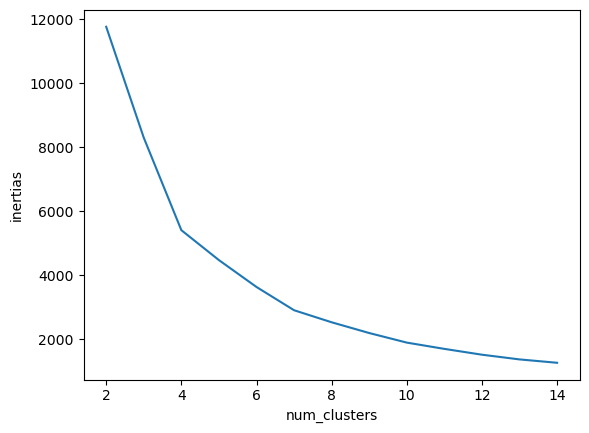

 Use 7 Clusters: Final Model     
Clusters:  [3 1 1 ... 0 6 0]
Inertia:  2912.206549891697


C:\Users\herlihpj\AppData\Local\Temp\ipykernel_21336\2171597209.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med_mine['labels']=labels


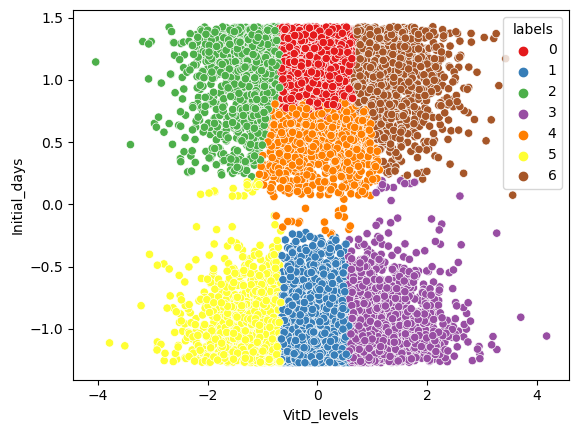

ReAdmis     0     1
labels             
0           0  1821
1        2364     0
2         230   916
3        1429     0
4         916     0
5        1219     0
6         173   932


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, k_means
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

med_dirty= pd.read_csv('/Users/herlihpj/Desktop/Data Analytics/D212 Data Mining II/Task 1/medical_clean.csv', 
                         index_col=0)
#Display all columns in the dataset
print(med_dirty.columns)

#Check for Null
print('Summary of Null: ')
print(med_dirty.isna().sum())

#Check for duplicated data
duplicates=med_dirty.duplicated()
print('Duplicates: ;', duplicates.sum())

#Explore the data/statistics
print(med_dirty.head())
print(med_dirty.describe())
print(med_dirty.info())

#Generate Visualizations
sns.scatterplot(y=med_dirty['Initial_days'],x=med_dirty['VitD_levels'],hue=med_dirty['ReAdmis'])
plt.show()

#Subset the dataframe
med_mine=med_dirty[['Initial_days', 'VitD_levels','ReAdmis']]
print(med_mine.columns)
print(med_mine.head())

#Standardize the Numerical data
numeric_cols=['Initial_days','VitD_levels']
scaler = StandardScaler()
scaler.fit(med_mine[numeric_cols])
med_mine[numeric_cols] = scaler.transform(med_mine[numeric_cols])
print(med_mine.head())

# Mapping the categorical variable to numerical, Yes = 0 and No = 1
med_mine['ReAdmis']=med_mine.ReAdmis.map(dict(Yes=1, No=0))

#Export the cleaned dataset to csv
med_mine.to_csv('/Users/herlihpj/Desktop/Data Analytics/D212 Data Mining II/Task 1/medical_prepared.csv')    
print('Prepared Data has been exported to CSV')
    
print('======================= \n Data has been prepared     \n======================= ')

### Begin K Means Clustering ###

## Generate Elbow Plot To Determine Optimal Number of Clusters ##
SEED=100
# Declaring variables for use
inertias = []
num_clusters = range(2, 15)
# Populating distortions for various clusters
for n in num_clusters:
    kmeans = KMeans(n_clusters=n, random_state=SEED)
    kmeans = kmeans.fit(med_mine)
    inertias.append(kmeans.inertia_)

# Plotting elbow plot data
elbow_plot_data = pd.DataFrame({'num_clusters': num_clusters,'inertias': inertias})
sns.lineplot(x='num_clusters', y='inertias',data = elbow_plot_data)
plt.show()
#Optimal K-Means was with 7 clusters

print('============================= \n Use 7 Clusters: Final Model     \n============================= ')

#Build final model with 7 clusters
model = KMeans(n_clusters=7, random_state=SEED)
model.fit(med_mine)
# Print clusters
print("Clusters: ", model.labels_)
# Print inertia
print("Inertia: ", model.inertia_)

#Create a new column with the cluster labels
labels=model.predict(med_mine)
med_mine['labels']=labels

#Plot clusters in scatter plot to help visualize
sns.scatterplot(y=med_mine['Initial_days'],x=med_mine['VitD_levels'], hue=med_mine['labels'],palette='Set1')
plt.show()

#Generate cross-tabulation table to compare clustering results to patient readmissions
ct = pd.crosstab(med_mine['labels'], med_mine['ReAdmis'])
print(ct)
